In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('College_Data',index_col=0)

In [ ]:
df.head()

In [ ]:
df.describe()

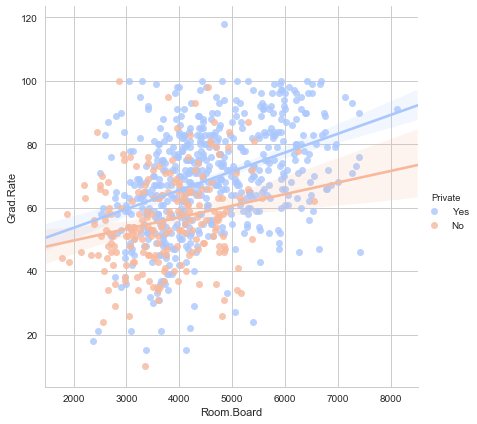

In [6]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=True)

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

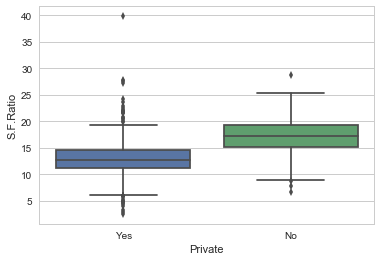

In [8]:
sns.boxplot(x='Private',y='S.F.Ratio',data=df)

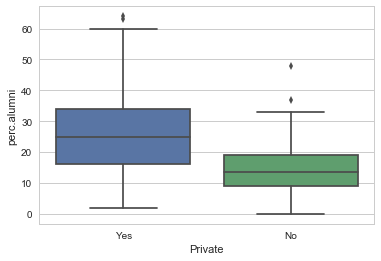

In [9]:
sns.boxplot(x='Private',y='perc.alumni',data=df)

**Create a similar histogram for the Grad.Rate column.**

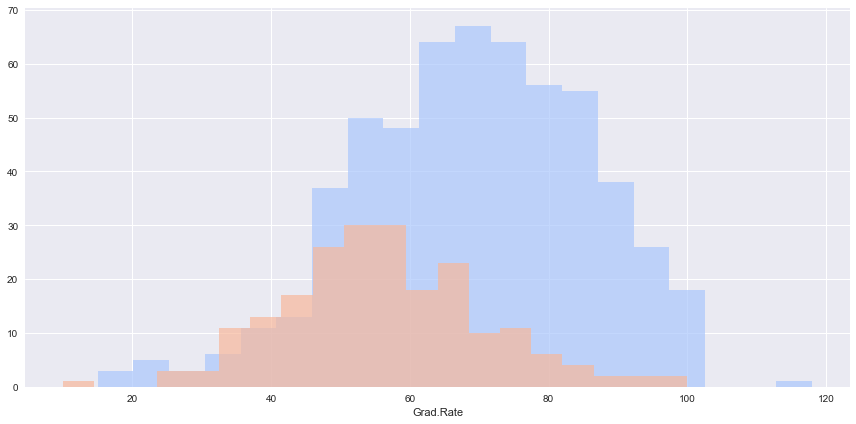

In [11]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

**There seems to be a private school with a graduation rate of higher than 100%**

In [12]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [14]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


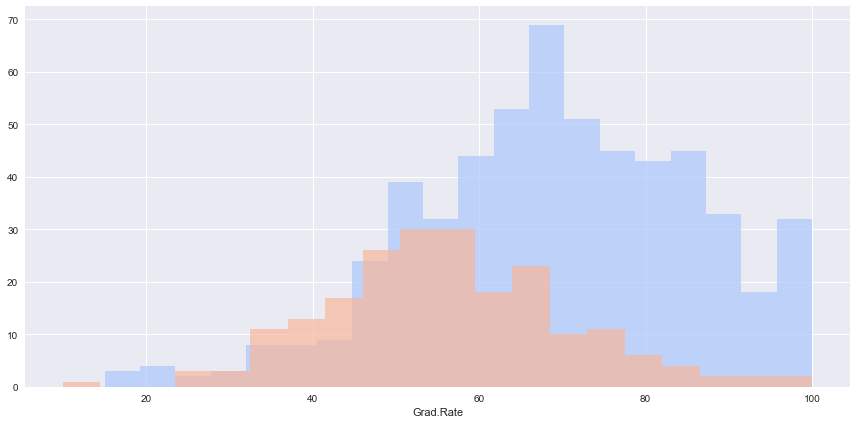

In [15]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [28]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=300,n_init=20)

In [41]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.001, verbose=0)

In [42]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01,   3.14814815e-01],
       [  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.50926756e+01,   7.93721973e-01]])

In [20]:
df[df['Private']=='Yes'].describe() # Statistics for private colleges only

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.966372
std,2443.341319,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.673032
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,619.000000,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,1133.000000,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,2186.000000,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,20192.000000,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [21]:
df[df['Private']=='No'].describe() # Statistics for public colleges only

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5729.919811,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453
std,5370.675335,3477.266276,1261.592009,16.180443,20.091058,6467.696087,2321.034696,2145.248389,858.139928,135.729935,677.515680,12.317525,12.069669,3.418049,7.518935,2695.541611,14.583412
min,233.000000,233.000000,153.000000,1.000000,12.000000,633.000000,9.000000,2580.000000,1780.000000,96.000000,400.000000,33.000000,33.000000,6.700000,0.000000,3605.000000,10.000000
25%,2190.750000,1563.250000,701.750000,12.000000,37.000000,3601.000000,600.000000,5366.000000,3121.500000,500.000000,1200.000000,71.000000,76.000000,15.100000,9.000000,5715.000000,46.000000
50%,4307.000000,2929.500000,1337.500000,19.000000,51.000000,6785.500000,1375.000000,6609.000000,3708.000000,550.000000,1649.000000,78.500000,86.000000,17.250000,13.500000,6716.500000,55.000000
75%,7722.500000,5264.000000,2243.750000,27.500000,65.000000,12507.000000,2495.250000,7844.000000,4362.000000,612.000000,2051.250000,86.000000,92.000000,19.325000,19.000000,8570.250000,65.000000
max,48094.000000,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,15732.000000,6540.000000,1125.000000,4288.000000,103.000000,100.000000,28.800000,48.000000,16527.000000,100.000000


In [43]:
df_desc=pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
kmclus

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,10363.138889,6550.898148,2569.722222,41.490741,70.203704,13061.935185,2464.861111,10719.175926,4643.472222,595.212963,1714.203704,86.398148,91.333333,14.027778,20.074074,14170.500000,67.592593,0.314815
1,1813.234679,1287.165919,491.044843,25.309417,53.470852,2188.548580,595.458894,10395.708520,4311.364723,541.982063,1280.336323,70.442451,77.825112,14.099701,23.174888,8932.046338,65.092676,0.793722


In [44]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [24]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [25]:
df1=df # Create a copy of data frame so that original data frame does not get 'corrupted' with the cluster index
df1['Cluster'] = df['Private'].apply(converter)

In [26]:
df1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [45]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df1['Cluster'],kmeans.labels_))
print(classification_report(df1['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]
             precision    recall  f1-score   support

          0       0.69      0.35      0.46       212
          1       0.79      0.94      0.86       565

avg / total       0.76      0.78      0.75       777



In [102]:
df_pvt=df[df['Private']=='Yes']
df_pub=df[df['Private']=='No']

In [103]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=50,n_init=10)
kmeans.fit(df.drop('Private',axis=1))
clus_cent=kmeans.cluster_centers_
df_desc=pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
a=np.array(kmclus.diff().iloc[1])
centroid_diff = pd.DataFrame(a,columns=['K-means cluster centroid-distance'],index=df_desc.columns)
centroid_diff['Mean of corresponding entity (private)']=np.array(df_pvt.mean())
centroid_diff['Mean of corresponding entity (public)']=np.array(df_pub.mean())
centroid_diff

,K-means cluster centroid-distance,Mean of corresponding entity (private),Mean of corresponding entity (public)
Apps,8549.904210,1977.929204,5729.919811
Accept,5263.732229,1305.702655,3919.287736
Enroll,2078.677379,456.945133,1640.872642
Top10perc,16.181324,29.330973,22.834906
Top25perc,16.732852,56.957522,52.702830
F.Undergrad,10873.386605,1872.168142,8571.004717
P.Undergrad,1869.402217,433.966372,1978.188679
Outstate,323.467406,11801.693805,6813.410377
Room.Board,332.107499,4586.143363,3748.240566
Books,53.230900,547.506195,554.377358
